### Set env

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns

### Dataset

In [2]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"


In [3]:
df = pd.read_csv(url,index_col=0)

### Preparing the dataset

In [4]:
df.dtypes

num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [5]:
df.head(n=2)

,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
engine_displacement,,,,,,,,,,
170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217


In [6]:
df = df.reset_index()

In [7]:
df.head(n=2)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217


In [8]:
df = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

### EDA

#### Question 1

In [9]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
df.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object

#### Question 2

In [11]:
df.horsepower.median()

149.0

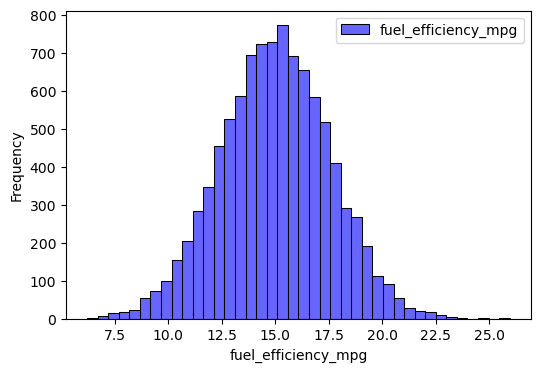

In [12]:
plt.figure(figsize=(6, 4))
fuel_efficiency_mpg = df.fuel_efficiency_mpg
sns.histplot(fuel_efficiency_mpg, label='fuel_efficiency_mpg', color='blue', alpha=0.6, bins=40)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('fuel_efficiency_mpg')
plt.show()

### Prepare and split the dataset

In [13]:
len(df)

9704

In [14]:
np.random.seed(42)

In [15]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n) 
np.random.shuffle(idx) 
df_shuffled = df.iloc[idx]
df_shuffled.head(n=4)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843


In [16]:
df_val = df_shuffled.iloc[:n_val].copy()
df_test = df_shuffled.iloc[n_val:n_test+n_val].copy()
df_train = df_shuffled.iloc[n_test+n_val:].copy()

In [17]:
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values
y_train = df_train.fuel_efficiency_mpg.values

In [18]:
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_train['fuel_efficiency_mpg']

#### Question 3

In [19]:
def prepare_X(df,na_value):
    df = df.fillna(na_value)
    df = df.values
    return df

In [20]:
def linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X) 
    XTX_inv = np.linalg.inv(XTX) 
    
    w = XTX_inv.dot(X.T).dot(y) 
    w0, w = w[0], w[1:]
    return w0, w

def rmse(y,y_pred):
    error = y_pred - y 
    mse = (error ** 2).mean()
    return float(np.sqrt(mse))

##### Fill in missing value of horsepower with 0

In [21]:
X_train_0 = prepare_X(df_train,0)
X_val_0 = prepare_X(df_val,0)

In [22]:
w0, w = linear_regression(X_train_0,y_train)
y_pred_train_0 = w0 + X_train_0.dot(w)
rmse_train_0 = rmse(y_train,y_pred_train_0)
round(rmse_train_0,2)

0.52

In [23]:
w0, w = linear_regression(X_val_0, y_val)
y_pred_val_0 = w0 + X_val_0.dot(w)
rmse_val_0 = rmse(y_val,y_pred_val_0)
round(rmse_val_0,2)

0.53

##### Fill in missing value of horsepower with mean of horsepower from df_train

In [24]:
hp_mean = df_train.horsepower.mean().round(2)

In [25]:
X_train_hp_mean = prepare_X(df_train,hp_mean)
X_val_hp_mean =  prepare_X(df_val,hp_mean)

In [26]:
w0, w = linear_regression(X_train_hp_mean,y_train)
y_pred_train_hp_mean = w0 + X_train_hp_mean.dot(w)
rmse_train_hp_mean = rmse(y_train,y_pred_train_hp_mean)
round(rmse_train_hp_mean,2)

0.46

In [27]:
w0, w = linear_regression(X_val_hp_mean, y_val)
y_pred_val_hp_mean = w0 + X_val_hp_mean.dot(w)
rmse_val_hp_mean = rmse(y_val,y_pred_val_hp_mean)
round(rmse_val_hp_mean,2)

0.47

#### Question 4

In [28]:
def linear_regression_reg(X,y,r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg 
    
    XTX_inv = np.linalg.inv(XTX) 
    
    w = XTX_inv.dot(X.T).dot(y) 
    w0, w = w[0], w[1:]
    return w0, w

In [29]:
for r in [0, 0.01, 0.1, 1, 5, 10,100]:
    w_0, w = linear_regression_reg(X_train_0, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[1], w[2]))

    0, 26.90, 0.00, -0.01
 0.01, 23.24, 0.00, -0.01
  0.1, 10.45, 0.00, -0.01
    1, 1.61, 0.00, -0.01
    5, 0.34, 0.00, -0.01
   10, 0.17, 0.00, -0.01
  100, 0.02, 0.00, -0.01


In [30]:
w0, w = linear_regression_reg(X_train_0,y_train,r=0)
y_pred_train_0 = w0 + X_train_0.dot(w)
rmse_train_0 = rmse(y_train,y_pred_train_0)
round(rmse_train_0,2)

0.52

In [31]:
w0, w = linear_regression_reg(X_val_0, y_val,r=0)
y_pred_val_0 = w0 + X_val_0.dot(w)
rmse_val_0 = rmse(y_val,y_pred_val_0)
round(rmse_val_0,2)

0.53

#### Question 5

In [46]:
seed_ = [0,1,2,3,4,5,6,7,8,9]
rmse_val = []
rmse_train = []

for i in seed_:
    np.random.seed(i)
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n) 
    np.random.shuffle(idx) 
    df_shuffled = df.iloc[idx]

    df_val = df_shuffled.iloc[:n_val].copy()
    df_test = df_shuffled.iloc[n_val:n_test+n_val].copy()
    df_train = df_shuffled.iloc[n_test+n_val:].copy()

    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    y_train = df_train.fuel_efficiency_mpg.values
    
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    del df_train['fuel_efficiency_mpg']

    X_train_0 = prepare_X(df_train,0)
    X_val_0 = prepare_X(df_val,0)

    w0, w = linear_regression(X_train_0,y_train)
    y_pred_train_0 = w0 + X_train_0.dot(w)
    rmse_train_0 = rmse(y_train,y_pred_train_0)
    
    rmse_train.append(rmse_train_0)
    
    w0, w = linear_regression(X_val_0, y_val)
    y_pred_val_0 = w0 + X_val_0.dot(w)
    rmse_val_0 = rmse(y_val,y_pred_val_0)
    
    
    rmse_val.append(rmse_val_0)

print("Std of rmse validation is : " +str(round(np.std(rmse_val),3)))
print("Std of rmse train is : " +str(round(np.std(rmse_train),3)))
 

Std of rmse validation is : 0.008
Std of rmse train is : 0.003


#### Question 6

In [52]:
np.random.seed(9)
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n) 
np.random.shuffle(idx) 
df_shuffled = df.iloc[idx]

df_val = df_shuffled.iloc[:n_val].copy()
df_test = df_shuffled.iloc[n_val:n_test+n_val].copy()
df_train = df_shuffled.iloc[n_test+n_val:].copy()
df_train_val = pd.concat([df_train,df_val])

y_train_val = df_train_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_train_val['fuel_efficiency_mpg']
del df_train['fuel_efficiency_mpg']

X_train_val_0 = prepare_X(df_train_val,0)
X_test_0 = prepare_X(df_test,0)

w0, w = linear_regression_reg(X_train_val_0,y_train_val,0.001)
y_pred_train_val_0 = w0 + X_train_val_0.dot(w)
rmse_train_val_0 = rmse(y_train_val,y_pred_train_val_0)
print("rmse_train_val_0 : " + str(round(rmse_train_val_0,3)))


w0, w = linear_regression_reg(X_test_0, y_test,0.001)
y_pred_test_0 = w0 + X_test_0.dot(w)
rmse_test_0 = rmse(y_test,y_pred_test_0)
print("rmse_test_0 : " + str(round(rmse_test_0,3)))


rmse_train_val_0 : 0.519
rmse_test_0 : 0.519
